![title](https://image.ibb.co/erDntK/logo2018.png)

---

<table  class="tfo-notebook-buttons" align="left"><tr><td>
    
<a href="https://colab.research.google.com/github/CNN-ADF/Task2020/blob/master/notebooks/CNN2020 - 01 - Linear Classification.ipynb" source="blank" ><img src="https://colab.research.google.com/assets/colab-badge.svg"></a>
</td><td>
<a href="https://github.com/CNN-ADF/Task2020/blob/master/notebooks/CNN2020 - 01 - Linear Classification.ipynb" source="blank" ><img src="https://i.ibb.co/6NxqGSF/pinpng-com-github-logo-png-small.png"></a>
    
</td></tr></table>

# Task 1 - Simple Linear Classification

In this assignment you will practice putting together a simple image classification pipeline, based on the SVM and Softmax classifier. 

The goals of this assignment are as follows:
* understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
* understand the train / val / test splits and the use of validation data for hyperparameter tuning.
* develop proficiency in writing efficient vectorized code with numpy

* implement and apply a Softmax classifier
* implement and apply a Multiclass Support Vector Machine (SVM) classifier

* understand the differences and tradeoffs between these classifiers

---
---
## 0 - Import necessary libraries and informations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=8)

---
---
## 1 - Load CIFAR-10 Dataset

* First, Obtain Cifar-10 dataset.
  There are from various source in Internet like [Keras](https://keras.io/datasets/), [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/datasets), or any other source
* Next you will prepare the dataset by first:
 * visualizing data
 * split into training, validation, and testing set
 * normalize data

---
### a. Import Data ***CIFAR-10***

In [2]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'forse', 'ship', 'truck']


170500096/170498071 [==============================] - 3s 0us/step


Check your implementation

In [3]:
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
X_test.shape  = (10000, 32, 32, 3)
y_test.shape  = (10000, 1)


**Expected Output**: 
<pre>
X_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
X_test.shape  = (10000, 32, 32, 3)
y_test.shape  = (10000, 1)


---
### b. Visualizing Data


Show the first 20 images from X_train

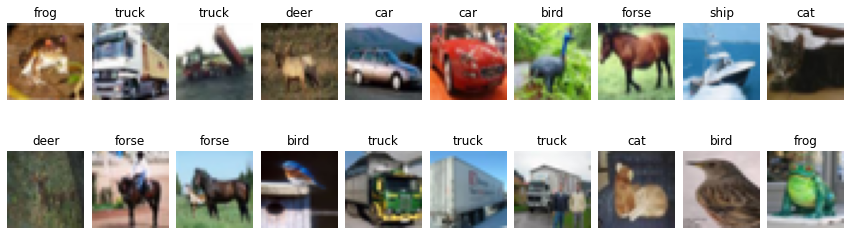

In [4]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10])
        ax[j,i].set_title(classes[y_train[i+j*10,0]])
        ax[j,i].axis('off')
plt.show()

---
### c. Split Training Data


#####<font color='red'>**EXERCISE**: </font>
* Cut the `last 1000 data` from `Training Set`, and save it as `Validation Set`

In [5]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

X_val = X_train[-10000:, :]
y_val = y_train[-10000:]

X_train = X_train[:-10000, :]
y_train = y_train[:-10000]


Check your implementation

In [6]:
print('X_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_val.shape   = (10000, 32, 32, 3)
y_val.shape   = (10000, 1)
X_train.shape = (40000, 32, 32, 3)
y_train.shape = (40000, 1)


**Expected Output**: 
<pre>X_val.shape   = (10000, 32, 32, 3)
y_val.shape   = (10000, 1)
X_train.shape = (40000, 32, 32, 3)
y_train.shape = (40000, 1)

---
### d. Normalizing Data

##### <font color='red'>**EXERCISE**: </font>
* Normalize `X_train`, `X_val`, and `X_test` by *zero-centering* them:
    1. calculate the `mean` of training data `X_train`
    * subtract `X_train`, `X_val`, and `X_test` using mean of `X_train`

In [7]:
mean_image = np.mean(X_train, axis=0)

X_train -= mean_image
X_val   -= mean_image
X_test  -= mean_image


Check your implementation

In [8]:
print('np.mean(X_train) =',np.mean(X_train))
print('np.mean(X_val)   =',np.mean(X_val))
print('np.mean(X_test)  =',np.mean(X_test))

np.mean(X_train) = -9.2315673e-07
np.mean(X_val)   = 0.14794703
np.mean(X_test)  = 0.8511902


**Expected Output**: 
<pre>np.mean(X_train) = -9.2315673e-07
np.mean(X_val)   = 0.14794703
np.mean(X_test)  = 0.8511902

---
### e. Reshape Data

#####<font color='red'>**EXERCISE**: </font>
* Reshape each data in `X_train`, `X_val`, and `X_test` into 1-dimensional matrix 

*Hint: use `np.reshape()`*

In [9]:
n, w, h, d = X_train.shape
X_train = X_train.reshape(( n, w*h*d ))

X_val   = X_val.reshape(( X_val.shape[0], X_val.shape[1]*X_val.shape[2]*X_val.shape[3] ))

n, w, h, d = X_test.shape
X_test  = X_test.reshape((n, w*h*d))


Check your implementation

In [10]:
print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)

X_train.shape = (40000, 3072)
X_val.shape   = (10000, 3072)
X_test.shape  = (10000, 3072)


**Expected Output**: 
<pre>X_train.shape = (40000, 3072)
X_val.shape   = (10000, 3072)
X_test.shape  = (10000, 3072)


#####<font color='red'>**EXERCISE**: </font>
* Reshape `y_train`, `y_val`, and `y_test` into a vector 

*Hint: use `np.ravel()`*

In [11]:
y_train = y_train.ravel()
y_val   = y_val.ravel()
y_test  = y_test.ravel()

Check your implementation

In [12]:
print('y_train.shape =',y_train.shape)
print('y_val.shape   =',y_val.shape)
print('y_test.shape  =',y_test.shape)

y_train.shape = (40000,)
y_val.shape   = (10000,)
y_test.shape  = (10000,)


**Expected Output**: 
<pre>y_train.shape = (40000,)
y_val.shape   = (10000,)
y_test.shape  = (10000,)


---
---
## 2 - Linear Function
* Complete the forward and backward function of basic linear regression function


---
### a. Forward Function

#####<font color='red'>**EXERCISE**: </font>
* Implement `forward function` for Linear Classifier as follow:

$$
\begin{align}
f(x, W, b) = x.W + b
\end{align}
$$

In [13]:
def forward(x, W, b):  
    v = x.dot(W) + b                      # x dot W + b    
    
    return v

Check your implementation

In [14]:
np.random.seed(2020)

X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
W = np.random.random((3, 2)) 
b = np.zeros((1, 2))

v = forward(X, W, b)

print('v.shape =', v.shape)
print('v =')
print(v)


v.shape = (4, 2)
v =
[[0.33691873 0.21695427]
 [0.84666425 0.48878998]
 [1.32319556 1.09034621]
 [1.83294108 1.36218193]]


**Expected Output**: 
<pre>v.shape = (4, 2) 
v =
[[0.33691873 0.21695427]
 [0.84666425 0.48878998]
 [1.32319556 1.09034621]
 [1.83294108 1.36218193]]

---
### b. Backward Function


#####<font color='red'>**EXERCISE**: </font>
* Implement `backward function` for Linear Classifier as follow:


$$
\begin{align*}
\partial W & = x^T.\partial out \\
\partial b & = \sum \partial out \\
\partial x & = \partial out.W^T \\
\end{align*}
$$

*Hint: use `axis=0` and `keepdims=True` to calculate $\partial b$*

In [15]:
def backward(dout, x, W, b):
    dW = np.dot(x.T, dout)                        # x.T dot dout
    db = np.sum(dout, axis=0, keepdims=True)      # sum dout, axis=0, keepdims=True
    dx = dout.dot(W.T)                            # dout dot W.T
    
    return dW, db, dx

Check your implementation

In [16]:
np.random.seed(2020)

dout = np.random.random((4, 2)) 
dW, db, dX = backward(dout, X, W, b)


In [17]:
print('dW.shape =', dW.shape)
print('dW =')
print(dW)

dW.shape = (3, 2)
dW =
[[0.61339587 0.56026986]
 [0.78622267 0.61515131]
 [2.10941822 1.70549752]]


**Expected Output**: 
<pre>
dW.shape = (3, 2) 
dW =
[[0.61339587 0.56026986]
 [0.78622267 0.61515131]
 [2.10941822 1.70549752]]


In [18]:
print('db.shape =', db.shape)
print('db =', db)

db.shape = (1, 2)
db = [[2.10941822 1.70549752]]


**Expected Output**: 
<pre>db.shape = (1, 2)
db = [[2.10941822 1.70549752]]

In [19]:
print('dX.shape =', dX.shape)
print('dX =')
print(dX)

dX.shape = (4, 3)
dX =
[[1.73555547 0.74016932 0.52178124]
 [0.74016932 0.33373516 0.23071873]
 [0.52178124 0.23071873 0.16058338]
 [0.57253207 0.23425843 0.16763411]]


**Expected Output**: 
<pre>dX.shape = (4, 3)
dX =
[[1.73555547 0.74016932 0.52178124]
 [0.74016932 0.33373516 0.23071873]
 [0.52178124 0.23071873 0.16058338]
 [0.57253207 0.23425843 0.16763411]]


---
---
## 3 - Softmax Function

* A very important concept to understand in numpy is `"broadcasting"`. 
* It is very useful for performing mathematical operations between arrays of different shapes. 
* For the full details on broadcasting, you can read the official [broadcasting documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

---
### a. Softmax Score

#####<font color='red'>**EXERCISE**: </font>
* Implement a `softmax score function` using numpy.


for a matrix $x \in \mathbb{R}^{m\times n}$
- $ n $ &nbsp; : number of data
- $ m $ &nbsp;: number of label
$x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$ 


thus we have
$$softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix}$$

it is equal to
$$softmax(x)  = \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} $$

In [20]:
def softmax(x):
    """Calculates the softmax for each row of the input x.

Argument:
    x -- A numpy matrix of shape (n,m)

    Returns:
    score -- A numpy matrix equal to the softmax of x, of shape (n,m)
          -- normalized log probabilities score
    """
    
    # 1. COMPUTE THE CLASS PROBABILITIES    
    
    # shift x by subtracting with its maximum value . Use np.max(...)
    x = x - np.max(x)
    
    # Apply exp() element-wise to x. Use np.exp(...).    
    x_exp = np.exp(x)

    # Create a vector X_sum that sums each row of X_exp.
    # Use np.sum(..., axis = 1, keepdims = True).
    x_sum = np.sum(x_exp, axis=1, keepdims=True)
    
    # Compute softmax(x) score by dividing X_exp by X_sum. 
    # It should automatically use numpy broadcasting.
    score = x_exp / x_sum
    
    return score

Check your implementation

In [21]:
np.random.seed(2020)

x = np.array([
    [1, 3, 0, 1 ,1],
    [0, 2, 0, 1, 9],
    [0, 1, 0, 1, 0]])

W = np.random.random((5, 2)) 
b = np.zeros((1, 2))

score = forward(x, W, b)

print("score = " )
print(score,'\n')
print("softmax(score) = " )
print(softmax(score))


score = 
[[3.65414948 2.18891435]
 [9.05539861 2.29728405]
 [0.78622267 0.61515131]] 

softmax(score) = 
[[0.81233207 0.18766793]
 [0.99883993 0.00116007]
 [0.54266384 0.45733616]]


**Expected Output**:
<pre>score = 
[[3.65414948 2.18891435]
 [9.05539861 2.29728405]
 [0.78622267 0.61515131]] 

softmax(score) = 
[[0.81233207 0.18766793]
 [0.99883993 0.00116007]
 [0.54266384 0.45733616]]

---
### b. Softmax Loss

#####<font color='red'>**EXERCISE**: </font>
* Implement a `softmax loss` function using numpy. 
 
- Loss of the `i-th data` is the normalized log probability of the score at the class should be<br>
  $$L_i =  -\log(\frac{e^{X_{y_i}}}{\sum_{j}e^{X_{j}}})$$<br><br>
 
- The Softmax Loss is the average of all data loss<br>
  $$L = \frac{1}{N}\sum^N_{i=1}L_i$$

In [24]:
def softmax_loss(score, y):
    """Calculates the softmax loss for each row of the input x.
    
    Argument:
    score -- A numpy matrix equal to the softmax of x, of shape (n,m)
          -- normalized log probabilities score
          
    y     -- A numpy vector of shape(n,)
          -- containing training labels;
          -- y[i] = c means that X[i] has label c, where 0 <= c < C.

    Returns:
    dscore -- A numpy matrix equal to the softmax of x, of shape (n,m)
           -- gradient score of softmax
    """
    
    num_examples = score.shape[0]
        
    # 2. COMPUTE THE LOSS : average cross-entropy loss
    #make a number list containing [1 2 3 ... n]
    number_list = range(num_examples)
    
    # calculate the correct log probability of score[number_list,y] by applycing -np.log(...)
    correct_logprobs = -np.log(score[number_list, y])
    
    # average the correct log probability, use np.sum then divide it by num_examples
    loss = np.sum(correct_logprobs)/num_examples
    
    # 3. COMPUTE THE GRADIENT ON SCORES
    dscores = score
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    return loss, dscores

Check your implementation

In [25]:
np.random.seed(2020)

x = np.array([
    [1, 3, 0, 1 ,1],
    [0, 2, 0, 1, 9],
    [0, 1, 0, 1, 0]])

y = np.array([
    0, 1, 0
])

W = np.random.random((5, 2)) 
b = np.zeros((1, 2))

score = forward(x, W, b)

print("score = " )
print(score, '\n')

score = softmax(score)
print("softmax(score) = " )
print(score,'\n')

loss, dscore  = softmax_loss(score, y)
print('loss   =',loss, '\n')
print('dscore =')
print(dscore)


score = 
[[3.65414948 2.18891435]
 [9.05539861 2.29728405]
 [0.78622267 0.61515131]] 

softmax(score) = 
[[0.81233207 0.18766793]
 [0.99883993 0.00116007]
 [0.54266384 0.45733616]] 

loss   = 2.526128866233045 

dscore =
[[-0.06255598  0.06255598]
 [ 0.33294664 -0.33294664]
 [-0.15244539  0.15244539]]


**Expected Output**:
<pre>score = 
[[3.65414948 2.18891435]
 [9.05539861 2.29728405]
 [0.78622267 0.61515131]] 

softmax(score) = 
[[0.81233207 0.18766793]
 [0.99883993 0.00116007]
 [0.54266384 0.45733616]] 

loss   = 2.526128866233045 

dscore =
[[-0.06255598  0.06255598]
 [ 0.33294664 -0.33294664]
 [-0.15244539  0.15244539]]

---
---
## 4 - Linear Classifier: Softmax Classifier
* Combine linear function and softmax function that you have completed to train a multiclass softmax classifier

---
### a. Weight Initialization

#####<font color='red'>**EXERCISE**: </font>
* Implement `Weight initialization function`
    - receive input size `n`, number of neuron `d`, and standard deviation `std`
    - generate normal random matrix `W` of size `(n x d)` and multiply it by `std`
    - generate zeros matrix `b` of size `(1 x d)`

In [29]:
def initialize_weights(n, d, std):
    W = np.random.randn(n, d) * std                 # np.random.random * std
    b = np.zeros((1, d))
    
    return W, b

---
### b. Training Function


#####<font color='red'>**EXERCISE**: </font> 
* Implement **Training Function**
    * call `forward function`
    * call `softmax function`
    * call `softmax_loss function`
    * call `backward function`
    * implement `weight update`

In [30]:
def train(X, y, W=None, b=None, learning_rate=1e-6, reg=1e4, num_iters=100, batch_size=200, verbose=False):
    
    num_classes = np.max(y) + 1 # assume y takes values 0...K-1 where K is number of classes
    
    # get number of training data and its dimension from X
    num_train, dim = X.shape
    
    # initialize new weights if W matrix is not provided
    # call initialize_weights function using dim, num_classes, and std=0.001
    if W is None:
        W, b = initialize_weights(dim, num_classes, 0.001)

    # Run stochastic gradient descent to optimize W
    loss_history = []
                     
    for it in range(num_iters):
        X_batch = None
        y_batch = None

        # Randomly select indices from training examples
        train_rows = np.arange(num_train)
        idxs = np.random.choice(train_rows, batch_size, replace=False)
  
        X_batch = X[idxs]
        y_batch = y[idxs]


        # calculate class score by calling forward function using X_batch, W, and b
        scores = forward(X_batch, W, b)
        
        # calculate softmax score by calling softmax function using scores
        softmax_score = softmax(scores)
        
        # evaluate loss and gradient by calling softmax_loss function using softmax_score and y_batch
        loss, dout = softmax_loss(softmax_score, y_batch)
    
        # append the loss history
        loss_history.append(loss)

        # calculate weights gradient by calling backward function using dout, X_batch, W, and b
        dW, db, _ = backward(dout, X_batch, W, b)
        
        # perform regulatization gradient
        dW += reg*W
        
        # perform parameter update by subtracting W and b with a fraction of dW and db
        # according to the learning rate
        W -= learning_rate * dW
        b -= learning_rate * db
        
        if verbose and it % 100 == 0:
            print ('iteration', it,'/',num_iters, ': loss =', loss)
    return loss_history, W, b

---
### c. Train the Softmax Classifier

Try the training Function using the initial parameter

In [31]:
loss, W, b = train(X_train, y_train)

Visualize the loss

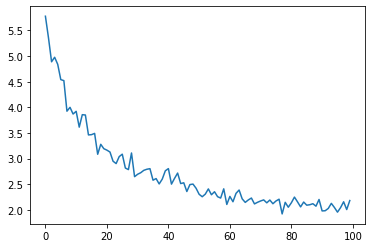

In [32]:
plt.plot(loss)
plt.show()

**Expected Output**:
The graph should show that the loss is generally decreased as the training goes

---
### d. Predict Function

#####<font color='red'>**EXERCISE**: </font>
* Implement **Predict Function**
    * call `forward function`

In [33]:
def predict(X, W, b):    
    y_pred = np.zeros(X.shape[1])

    
    # calculate class score by calling forward function using X, W, and b
    y_pred = forward(X, W, b)
    
    # take the maximum prediction and use that column to get the class     
    y_pred = y_pred.argmax(axis=-1)
    
    return y_pred

Check your implementation

In [34]:
import sklearn
from sklearn.metrics import accuracy_score

y_pred = predict(X_train, W, b)
accuracy = sklearn.metrics.accuracy_score(y_train, y_pred)

print('Training Accuracy =', accuracy*100,'%')

print('Training label  =', y_test[:15])
print('Predicted label =', y_pred[:15])

Training Accuracy = 28.6675 %
Training label  = [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9]
Predicted label = [6 1 9 6 9 1 2 4 8 9 4 6 9 5 2]


**Expected Output**:

You should get about **`27-29%`** accuracy on training set using the initial run

---

In [35]:
y_pred = predict(X_val, W, b)
accuracy = sklearn.metrics.accuracy_score(y_val, y_pred)
print('Validation Accuracy =', accuracy*100,'%')

print('Validation label =',y_test[:15])
print('Predicted label  =',y_pred[:15])

Validation Accuracy = 27.900000000000002 %
Validation label = [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9]
Predicted label  = [9 9 4 9 6 4 6 6 8 4 5 4 0 0 1]


**Expected Output**:

You should also get about **`27-29%`** accuracy on validation set

You can retrain further the weights by adding the pre-trained `W` and `b` to the arguments when calling training function


---
---
## 5 - Hyperparameter Tuning
* After you find that the classifier is working properly, next
* Find the best Learning Rate and Regularization Strength




---
###a. Try Another Hyperparameter Combination

Try to add another combination of learning rates and regularization strength 


#####<font color='red'>**EXERCISE**: </font>
* Use the `validation set` to tune hyperparameters (regularization strength and learning rate). 
     * Greedily loop over `learning_rates` and `regulatization` to get all combination
     
     
* You **should** experiment with different ranges for the learning rates and regularization strengths; 

In [36]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(None)

results = {}
best_val = -1
best_W = None
best_b = None
learning_rates = [1e-7, 5e-7]
regularization_strengths = [9e4, 1e5]

iterations = 2000

# Greedily loop over learning_rates and regularization_strengths
for lr in learning_rates:
    for reg in regularization_strengths:
        print('Running {} iterations, rate = {}, reg = {}'.format(iterations, lr, reg))
        # call train function using the learning rate and regularization selected
        loss, W, b = train(X_train, y_train, 
                              learning_rate=lr, reg=reg,
                              num_iters=iterations, verbose=False)
        
        # call predict function using pretrained W and b on X_train and X_val to evaluate
        y_train_pred = predict(X_train, W, b)
        y_val_pred = predict(X_val, W, b)
        
        # calculate the accuracy
        train_accuracy = np.mean(y_train == y_train_pred)
        val_accuracy   = np.mean(y_val == y_val_pred)
        
        print ('lr = {}, reg = {}, test accuracy = {}, validation accuracy = {}'.format(
            lr, reg, train_accuracy, val_accuracy))
        
        # store the result accuracy combination
        results[(lr, reg)] = (train_accuracy, val_accuracy)
        
        # store the best Weight and Bias
        if val_accuracy > best_val:
            best_W   = W
            best_b   = b
            best_val = val_accuracy


    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr',lr,',reg',reg,', train accuracy: ',train_accuracy*100,'%, val accuracy: ', val_accuracy ,'%')
    
print()
print('best validation accuracy achieved during cross-validation:',best_val*100,'%')
print('best Weights and bias are stored in `best_W` and `best_b`')

Running 2000 iterations, rate = 1e-07, reg = 90000.0
lr = 1e-07, reg = 90000.0, test accuracy = 0.3132, validation accuracy = 0.313
Running 2000 iterations, rate = 1e-07, reg = 100000.0
lr = 1e-07, reg = 100000.0, test accuracy = 0.307475, validation accuracy = 0.306
Running 2000 iterations, rate = 5e-07, reg = 90000.0
lr = 5e-07, reg = 90000.0, test accuracy = 0.312125, validation accuracy = 0.3085
Running 2000 iterations, rate = 5e-07, reg = 100000.0
lr = 5e-07, reg = 100000.0, test accuracy = 0.315175, validation accuracy = 0.3111
lr 1e-07 ,reg 90000.0 , train accuracy:  31.319999999999997 %, val accuracy:  0.313 %
lr 1e-07 ,reg 100000.0 , train accuracy:  30.7475 %, val accuracy:  0.306 %
lr 5e-07 ,reg 90000.0 , train accuracy:  31.2125 %, val accuracy:  0.3085 %
lr 5e-07 ,reg 100000.0 , train accuracy:  31.5175 %, val accuracy:  0.3111 %

best validation accuracy achieved during cross-validation: 31.3 %
best Weights and bias are stored in `best_W` and `best_b`


**Expected Output**:

if you are careful you should be able to get a classification accuracy of **over 35%** on the validation set


---
### b. Test the Trained Weights

#####<font color='red'>**EXERCISE**: </font>
* Test the **Best Weights and Bias** to the `X_test`

In [37]:
y_pred = predict(X_test, best_W, best_b)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)

print('Testing Accuracy =', accuracy*100,'%')
print('Test label       =', y_test[:15])
print('Predicted label  =', y_pred[:15])

Testing Accuracy = 31.5 %
Test label       = [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9]
Predicted label  = [6 8 8 8 5 6 6 6 0 8 8 9 5 1 9]


**Expected Output**:

You should reach at least  **32%** accuracy on test set


---
---
## 6 - Vizualize the Trained Weights 

Visualize the learned weights for each class for each class


---
### a. Retrieve one class weights
Try to visualize one trained weights.<br><br>
**Note:** You can change the `id`

In [38]:
id = 0

# get the id-th column from best weight
w = best_W[:,id]

print('w.shape =',w.shape)

w.shape = (3072,)


**Expected Output**:
<pre>
w.shape = (3072,)


---
### b. Normalize the weight for visualization
Image plot can only receive input range [0..1] for float type, or [0..255] for integer type, and the weights are not in those range.

So we need to normalize. Here we use MinMaxScaler from sklearn toolkit

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0.05,.95))
w = scaler.fit_transform(w.reshape(-1, 1))

print('w.shape =',w.shape)

w.shape = (3072, 1)


**Expected Output**:
<pre>
w.shape = (3072, 1)

---
### c. Visualize the weight 
Now reshape the weight back to (32,32,3), and plot the image. Use `np.reshape()`

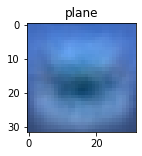

In [40]:
w = w.reshape((32, 32, 3))

plt.figure(figsize=(2,2))
plt.imshow(w)
plt.title(classes[id])
plt.show()

---
### d. Do it to the other weights

#####<font color='red'>**EXERCISE**: </font>
* complete the implementation to show the trained weight visualizations

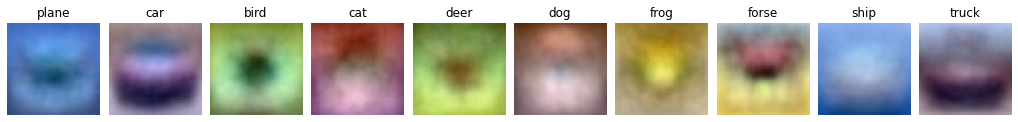

In [41]:
fig, ax = plt.subplots(1,10,figsize=(18,5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(0, 10):
    # get the i-th weight from best_W
    w = best_W[:,i]
    
    # normalize the weight (see previous example)
    w = scaler.fit_transform(w.reshape(-1, 1))
    
    # reshape the weight
    w = w.reshape((32, 32, 3))
    
    ax[i].imshow(w)
    ax[i].axis('off')
    ax[i].set_title(classes[i])
plt.show()

**Expected Output**:

You should see that the weights visualization should  match the ilustration below

![cifar10](http://cs231n.github.io/assets/templates.jpg)


---
---
## 7 - Linear Classifier: Multiclass SVM
Similar to before, let's build a Linear classifier to classify cifar-10 dataset, but now using Multiclass SVM loss, or Hinge Loss

---
### a. SVM Loss
Calculates the SVM loss for each row of the input x

#####<font color='red'>**EXERCISE**: </font>
* Implement `Multiclass SVM Loss` or `Hinge Loss`

In [42]:
def svm_loss(score, y):
    """    
    Argument:
    score -- A numpy matrix equal to the softmax of x, of shape (n,m)
          -- normalized log probabilities score
          
    y     -- A numpy vector of shape(n,)
          -- containing training labels;
          -- y[i] = c means that X[i] has label c, where 0 <= c < C.

    Returns:
    dscore -- A numpy matrix equal to the softmax of x, of shape (n,m)
           -- gradient score of softmax
    """
    
    num_examples = score.shape[0]
    
    
    # 1. COMPUTE THE SVM LOSS
    
    # get the correct class score. Use np.choose( , ) using y and score.T
    correct_scores = np.choose(y, score.T)
    
    # calculate margin: score.T subtracted by correct_score, then add by 1
    margin = score.T - correct_scores + 1
    
    # remove all margin below 0. Use np.maximum(0, margin)
    margin = np.maximum(0, margin)
        
    # COMPUTE THE LOSS 
    # calculate SVM loss of each data: sum of margin of non-target class
    # simply total all the margin (use np.sum()), and subtract it by 1
    loss_i = np.sum(margin) - num_examples
        
    
    # average loss_i by num_examples
    loss = loss_i/num_examples
    
    
    # 2. COMPUTE THE GRADIENT ON SCORES
    # margins for the correct class have already been set to 0
    dscores = (margin.T > 0).astype(float)
    marginsSum = dscores.sum(1) - 1
    dscores[range(dscores.shape[0]), y] = -marginsSum
        
    return loss, dscores

Check your implementation

In [43]:
np.random.seed(2020)

x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0],
    [1, 0, 3, 5 ,0]])

y = np.array([
    0, 0, 1
])

W = np.random.random((5, 2)) 
b = np.zeros((1, 2))

score = forward(x, W, b)

print("score = " )
print(score)
print()

loss, dscore  = svm_loss(score, y)
print('loss   =',loss)
print('dscore =')
print(dscore)


score = 
[[11.58057615  9.48897027]
 [ 9.45266543  7.47292219]
 [ 3.37941873  3.2408327 ]]

loss   = 0.37952867436659093
dscore =
[[-0.  0.]
 [-0.  0.]
 [ 1. -1.]]


**Expected Output**:
<pre>
score = 
[[11.58057615  9.48897027]
 [ 9.45266543  7.47292219]
 [ 3.37941873  3.2408327 ]]

loss   = 0.37952867436659093
dscore =
[[-0.  0.]
 [-0.  0.]
 [ 1. -1.]]


---

Notice the loss gradients resulted from SVM Loss. 

What's the difference between those gradients and Softmax Gradients?

What are the effects?

---
### b. Training Function

#####<font color='red'>**EXERCISE**: </font>
* The same as the training function using Softmax before, complete the train function below, 
* but rather than using `softmax_loss`, use `svm_loss`

In [44]:
def train_svm(X, y, W=None, b=None, learning_rate=1e-6, reg=1e4, num_iters=100, batch_size=200, verbose=False):
    num_train, dim = X.shape
    num_classes = np.max(y) + 1 # assume y takes values 0...K-1 where K is number of classes
    
    if W is None:
        W = 0.001 * np.random.randn(dim, num_classes)
    if b is None:
        b = np.zeros((1,num_classes))

    # Run stochastic gradient descent to optimize W
    loss_history = []
                     
    for it in range(num_iters):
        X_batch = None
        y_batch = None

        # Randomly select indices from training examples
        train_rows = np.arange(num_train)
        idxs = np.random.choice(train_rows, batch_size, replace=False)
  
        X_batch = X[idxs]
        y_batch = y[idxs]


        # calculate class score by calling forward function using X_batch, W, and b
        scores = forward(X_batch, W, b)
                
        # evaluate loss and gradient by calling svm_loss function using score and y_batch
        loss, dout = svm_loss(scores, y_batch)
    
        # append the loss history
        loss_history.append(loss)

        # calculate weights gradient by calling backward function using dout, X_batch, W, and b
        dW, db, _ = backward(dout, X_batch, W, b)
        
        # perform regulatization gradient
        dW += reg*W
        
        # perform parameter update by subtracting W and b with a fraction of dW and db
        # according to the learning rate
        W -= learning_rate * dW
        b -= learning_rate * db
        
        if verbose and it % 100 == 0:
            print ('iteration', it,'/',num_iters, ': loss =', loss)
    return loss_history, W, b

---
### c. Hyperparameter Tuning

#####<font color='red'>**EXERCISE**: </font>
* Again, complete the codes below similar to the Hyperparameter tuning for `Softmax Classifier`

In [45]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(None)

results = {}
best_val = -1
best_W = None
best_b = None
learning_rates = [1e-7, 5e-7]
regularization_strengths = [1e5, 2e5]

iterations = 2000

# Greedily loop over learning_rates and regularization_strengths
for lr in learning_rates:
    for reg in regularization_strengths:
        print('Running {} iterations, rate = {}, reg = {}'.format(iterations, lr, reg))
        # call train function using the learning rate and regularization selected
        loss, W, b = train_svm(X_train, y_train, 
                              learning_rate=lr, reg=reg,
                              num_iters=iterations, verbose=False)
        
        # call predict function using pretrained W and b on X_train and X_val to evaluate
        y_train_pred = predict(X_train, W, b)
        y_val_pred   = predict(X_val, W, b)
        
        # calculate the accuracy
        train_accuracy = np.mean(y_train == y_train_pred)
        val_accuracy   = np.mean(y_val == y_val_pred)
        
        print ('rate = {}, reg = {}, test accuracy = {}, validation accuracy = {}'.format(
            lr, reg, train_accuracy, val_accuracy))
        
        # store the result accuracy combination
        results[(lr, reg)] = (train_accuracy, val_accuracy)
        
        # store the best Weight and Bias
        if val_accuracy > best_val:
            best_W   = W
            best_b   = b
            best_val = val_accuracy

            
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr',lr,',reg',reg,', train accuracy: ', train_accuracy*100,'%, val accuracy: ', val_accuracy ,'%')
    
print()
print('best validation accuracy achieved during cross-validation:', best_val*100, '%')

Running 2000 iterations, rate = 1e-07, reg = 100000.0
rate = 1e-07, reg = 100000.0, test accuracy = 0.25265, validation accuracy = 0.2464
Running 2000 iterations, rate = 1e-07, reg = 200000.0
rate = 1e-07, reg = 200000.0, test accuracy = 0.216975, validation accuracy = 0.2175
Running 2000 iterations, rate = 5e-07, reg = 100000.0
rate = 5e-07, reg = 100000.0, test accuracy = 0.245175, validation accuracy = 0.2432
Running 2000 iterations, rate = 5e-07, reg = 200000.0
rate = 5e-07, reg = 200000.0, test accuracy = 0.21205, validation accuracy = 0.2116
lr 1e-07 ,reg 100000.0 , train accuracy:  25.264999999999997 %, val accuracy:  0.2464 %
lr 1e-07 ,reg 200000.0 , train accuracy:  21.6975 %, val accuracy:  0.2175 %
lr 5e-07 ,reg 100000.0 , train accuracy:  24.517500000000002 %, val accuracy:  0.2432 %
lr 5e-07 ,reg 200000.0 , train accuracy:  21.205 %, val accuracy:  0.2116 %

best validation accuracy achieved during cross-validation: 24.64 %


**Expected Output**:

You should reach `at least`  **`30%`** accuracy on cross-validation

---
### d. Visualize the Trained Weights 

#####<font color='red'>**EXERCISE**: </font>
* complete the implementation to show the trained weight visualizations

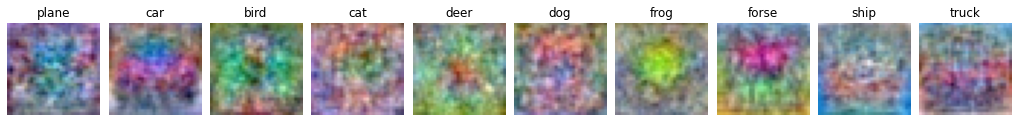

In [46]:
fig, ax = plt.subplots(1,10,figsize=(18,5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(0, 10):
    # get the i-th weight
    w = best_W[:,i]
    
    # normalize the weight
    w = scaler.fit_transform(w.reshape(-1, 1))
    
    # reshape the weight
    w = w.reshape((32, 32, 3))
    
    ax[i].imshow(w)
    ax[i].axis('off')
    ax[i].set_title(classes[i])
plt.show()

### Notice the difference in weight visualization
Describe what your visualized SVM weights look like. Think on why they look they way that they do.

---


---

# Congratulation, You've Completed Exercise 1

<p>Copyright &copy;  <a href=https://www.linkedin.com/in/andityaarifianto/>2020 - ADF</a> </p>

![footer](https://image.ibb.co/hAHDYK/footer2018.png)